In [1]:
import torch
# import numpy as np
# import scipy.sparse.linalg
import matplotlib.pyplot as plt
# import time

## Path for Eigen Vectors of single method

torch.Size([1024, 5])


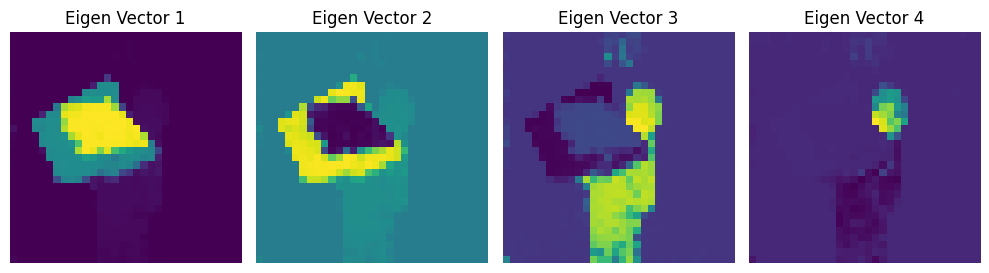

In [9]:
# Path for Eigen Vectors
# path = "/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/object-segmentation/ECSSD/eigs_dot1PCA64pred_dssubmax_10/"
path = "/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/object-segmentation/ECSSD/eigs_dot1PCA64linearpredlinear_dssubmax_pred2_run2/"
file='0125_resized.pth'
data = torch.load(path + file)


# path = "/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/object-segmentation/ECSSD/arxivs/arxiv_simsiam_ds/eigs_cosine_dot1projpredLinearsimsiam_ds_10/laplacian/"
# data = torch.load(path + '0002.pth')
eigen_values = data['eigenvalues']
eigen_vectors = data['eigenvectors'].T
print(eigen_vectors.shape)

# Number of eigenvectors to compute plus 1 (zeroth eigenvector will be noise)
K = 5
h=32
w=32
titles = ['Eigen Vector 1', 'Eigen Vector 2', 'Eigen Vector 3','Eigen Vector 4']
plt.figure(figsize=(10, 8))
for j, (title, eigenvectors) in enumerate([
    ("PCA Projector", eigen_vectors)]):
    # plt.suptitle(title)
    for i in range(1, K):
        plt.subplot(1, K - 1, i + j * (K - 1))
        image = eigenvectors[:,i].reshape(h, w)

       # Image.fromarray(image).convert('L').save("/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/object-segmentation/ECSSD/vis_eign")
        # Make image positive because it looks nicer
        if image.mean() < 0: image = -image
        # plt.title("PCA Projector")
        plt.imshow(image)
        plt.title(titles[i-1])
        plt.axis('off')
plt.tight_layout()
plt.show()

## Path for Eigen Vectors for Multiple MEthods

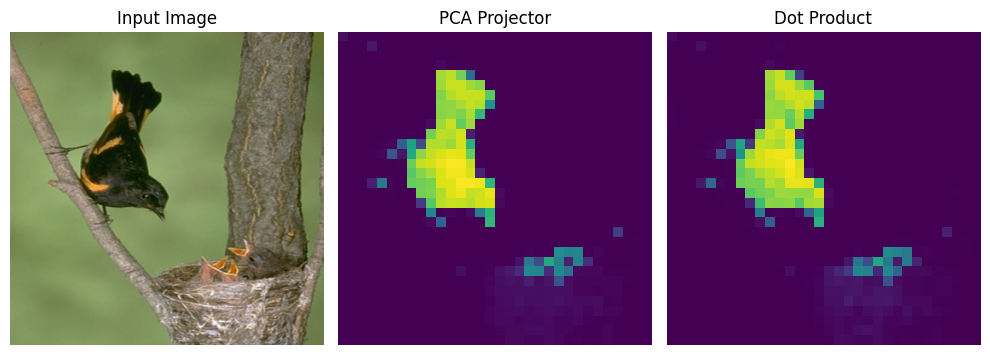

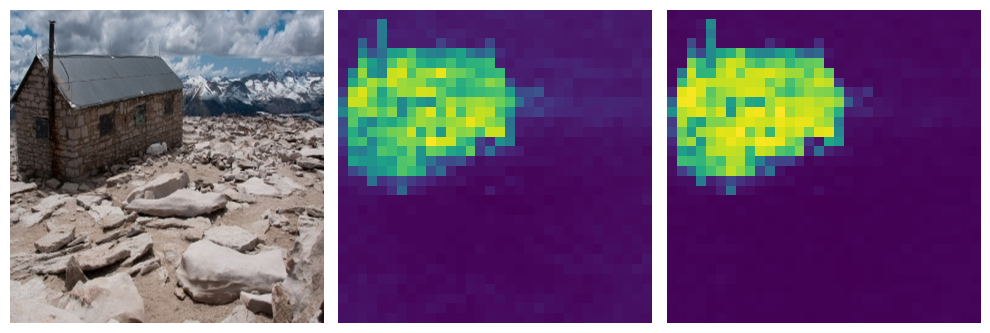

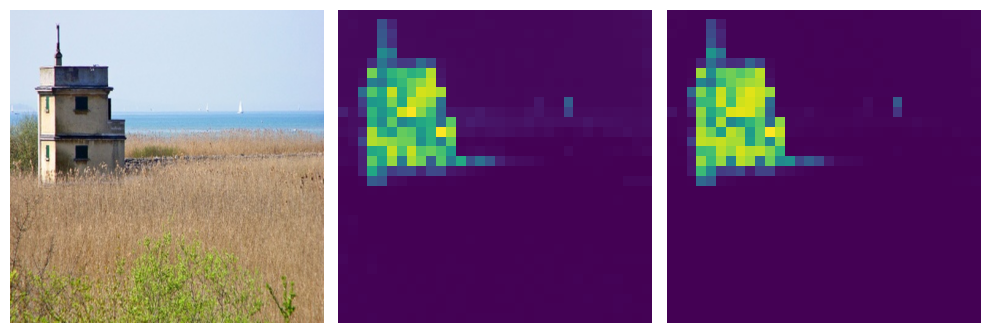

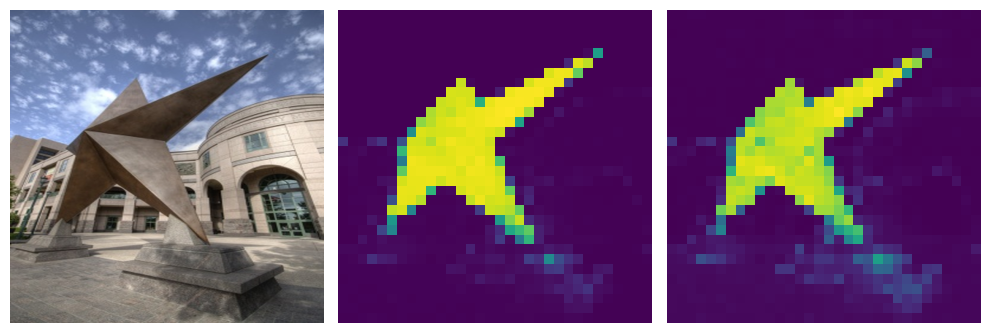

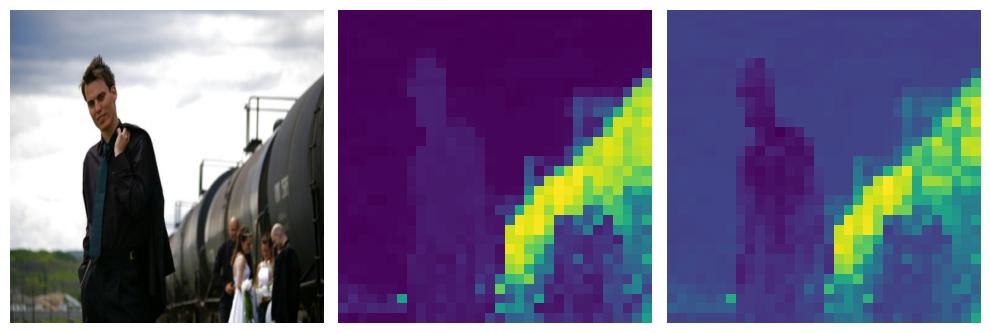

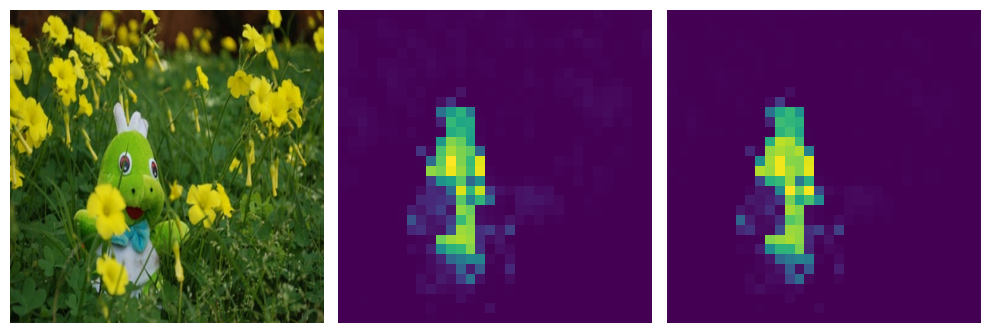

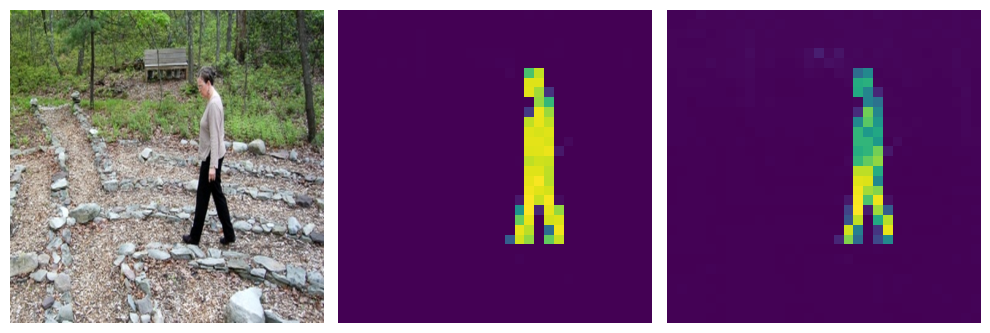

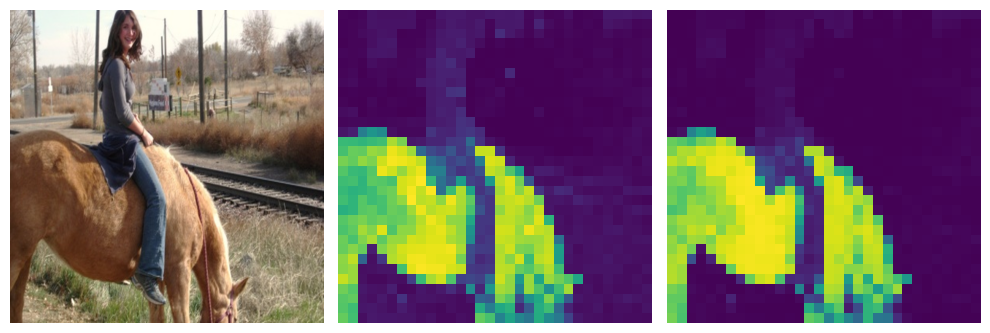

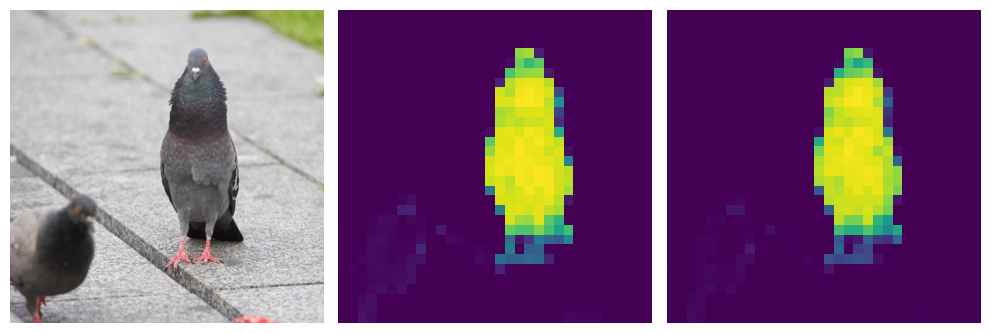

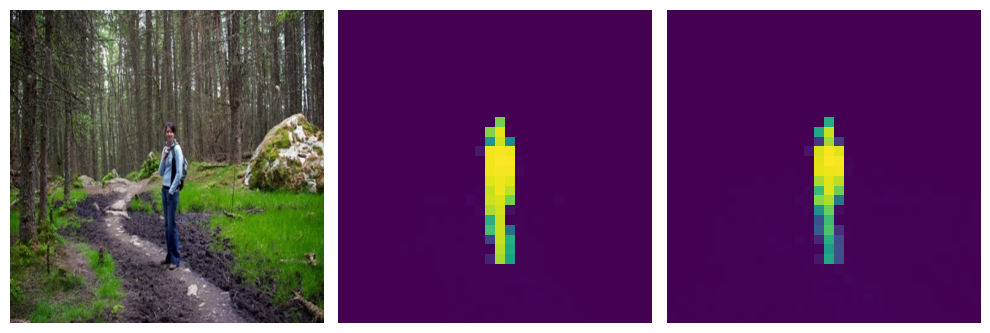

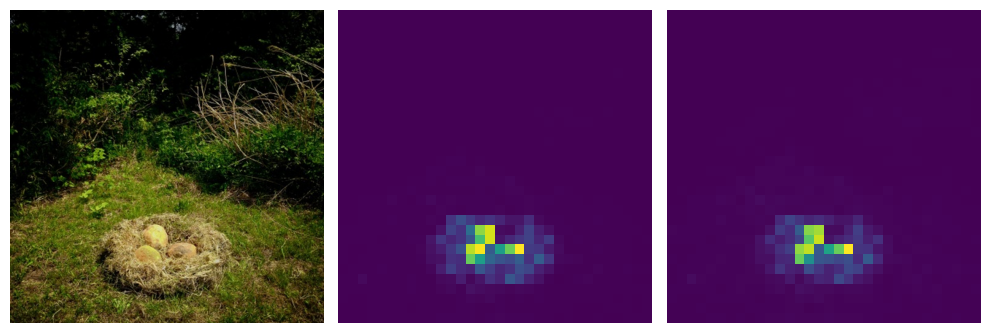

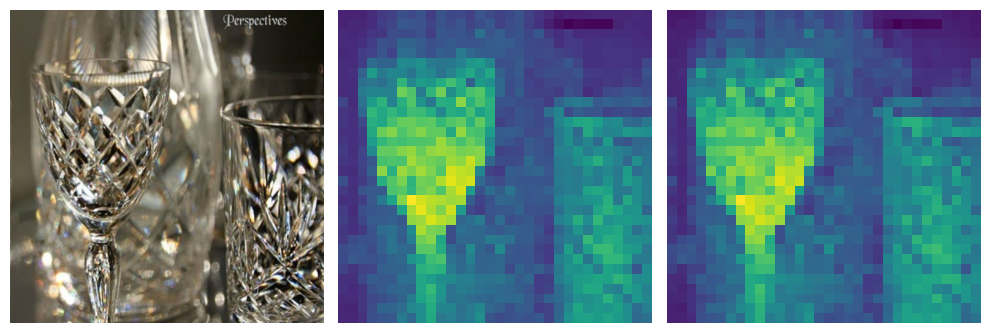

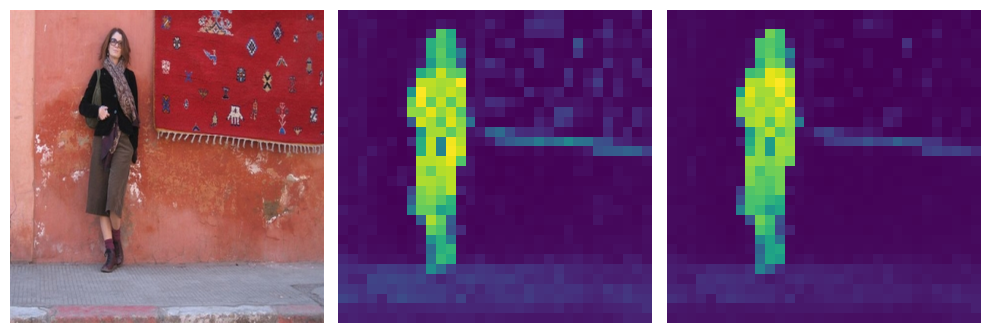

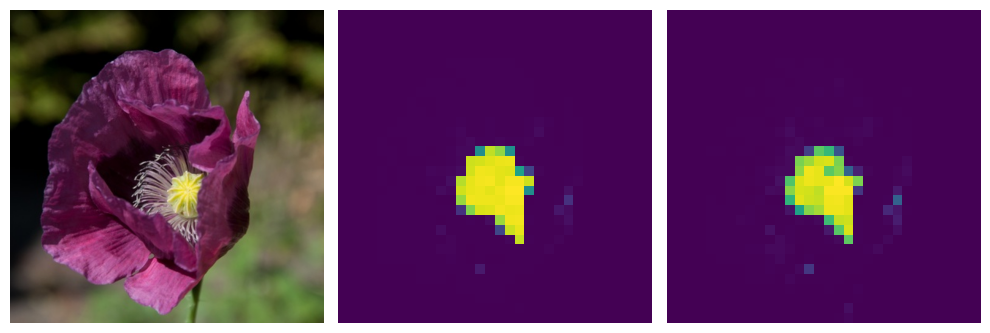

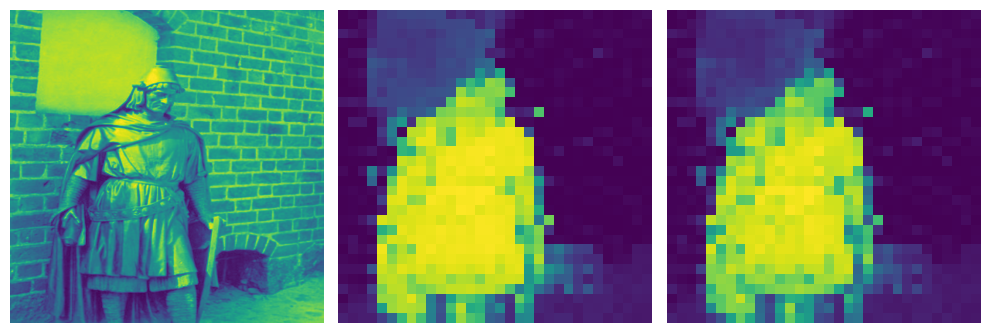

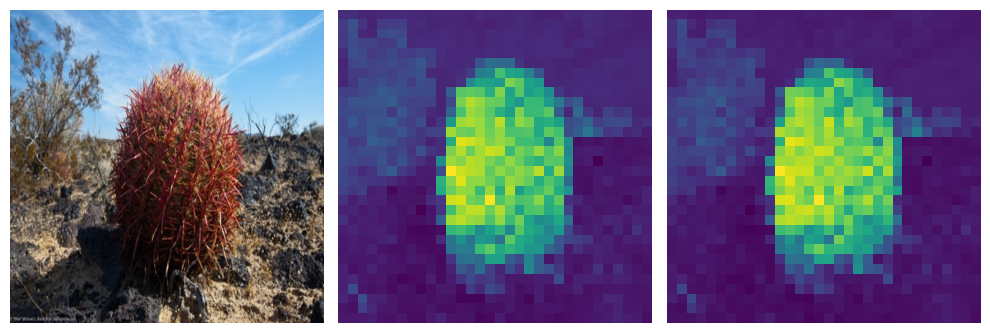

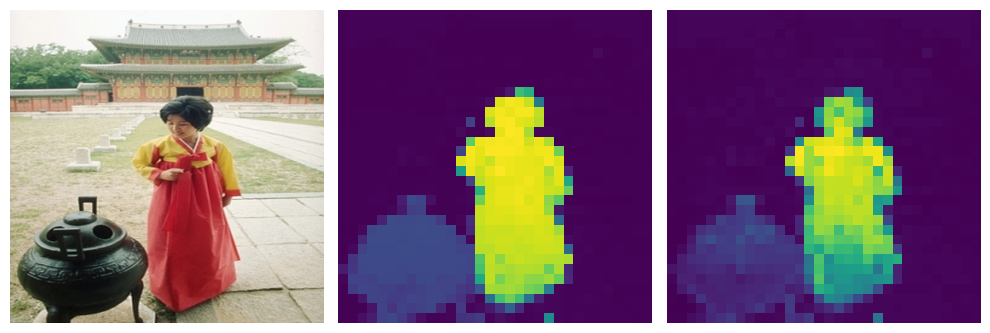

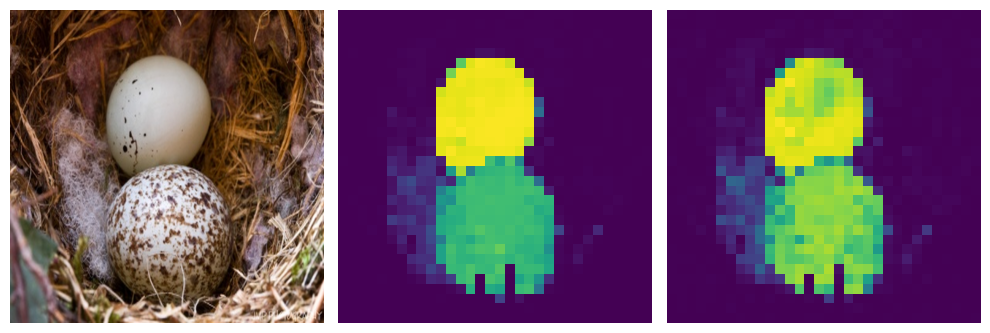

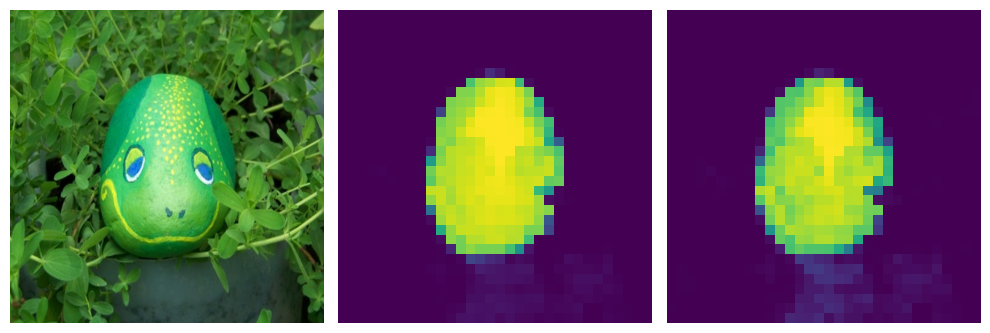

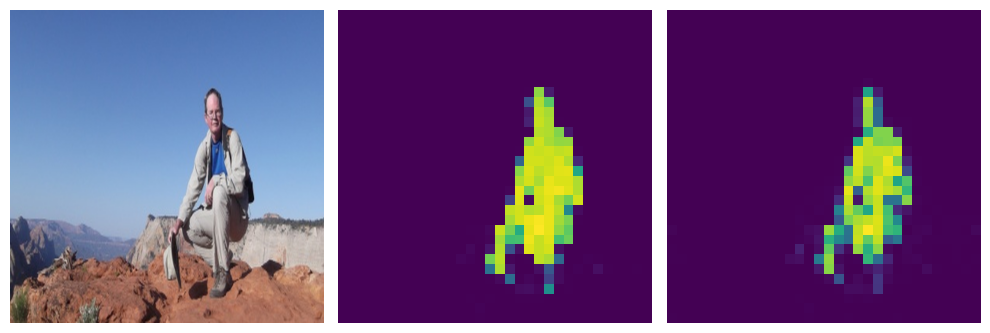

In [20]:
import matplotlib.image as mpimg
# Path for Eigen Vectors
image_path = '/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/object-segmentation/ECSSD/images/'

method1 = "/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/object-segmentation/ECSSD/eigs_dot1PCA64pred_dssubmax_10/"
method2 = "/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/object-segmentation/ECSSD/eigs/"

file='0079_resized'

# Number of eigenvectors to compute plus 1 (zeroth eigenvector will be noise)
K = 5
h=32
w=32
titles = ['PCA Projector', 'Dot Product', 'Eigen Vector 3','Eigen Vector 4']
filenames=["0022_resized",  "0181_resized",  "0461_resized",  "0574_resized","0076_resized",  "0277_resized",  "0478_resized",  "0602_resized", "0079_resized",  "0309_resized", "0511_resized" , "0766_resized", "0086_resized",  "0376_resized",  "0557_resized",  "0780_resized", "0095_resized",  "0403_resized",  "0566_resized",  "0800_resized"]

for idx,file in enumerate(filenames):
    plt.figure(figsize=(10, 8))
    image_ip=mpimg.imread(image_path+file+'.png')

    data1 = torch.load(method1+file+'.pth')
    eigen_values1 = data1['eigenvalues']
    eigen_vectors1 = data1['eigenvectors'].T
    # print(eigen_vectors1.shape)
    # Path for Eigen Vectors

    data2 = torch.load(method2+file+'.pth')
    eigen_values2 = data2['eigenvalues']
    eigen_vectors2 = data2['eigenvectors'].T
    # print(eigen_vectors2.shape)

    plt.subplot(1,3,1)
    plt.imshow(image_ip)
    if idx==0:
        plt.title('Input Image')
    plt.axis('off')
    for j, (title,eigenvectors) in enumerate([("PCA Projector",eigen_vectors1),
                                      ("Dot Product", eigen_vectors2)
                                      ]):
        plt.subplot(1, 3, j+2)
        image = eigenvectors[:,1].reshape(h, w)
       # Image.fromarray(image).convert('L').save("/home/phdcs2/Hard_Disk/Datasets/Deep-Spectral-Segmentation/data/object-segmentation/ECSSD/vis_eign")
        # Make image positive because it looks nicer
        if image.mean() < 0: image = -image
        # plt.title("PCA Projector")
        plt.imshow(image)
        if idx==0:
            plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()